In [1]:
import os
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

print("Welcome to the NeuralNine (c) Handwritten Digits Recognition v0.1")

# Decide if to load an existing model or to train a new one
train_new_model = True

if train_new_model:
    # Loading the MNIST data set with samples and splitting it
    mnist = tf.keras.datasets.mnist
    (X_train, y_train), (X_test, y_test) = mnist.load_data()

    # Normalizing the data (making length = 1)
    X_train = tf.keras.utils.normalize(X_train, axis=1)
    X_test = tf.keras.utils.normalize(X_test, axis=1)

    # Create a neural network model
    # Add one flattened input layer for the pixels
    # Add two dense hidden layers
    # Add one dense output layer for the 10 digits
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(units=128, activation=tf.nn.relu))
    model.add(tf.keras.layers.Dense(units=128, activation=tf.nn.relu))
    model.add(tf.keras.layers.Dense(units=10, activation=tf.nn.softmax))

    # Compiling and optimizing model
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Training the model
    model.fit(X_train, y_train, epochs=20)

    # Evaluating the model
    val_loss, val_acc = model.evaluate(X_test, y_test)
    print(val_loss)
    print(val_acc)

    # Saving the model
    model.save('handwritten_digits.model')
else:
    # Load the model
    model = tf.keras.models.load_model('handwritten_digits.model')



Welcome to the NeuralNine (c) Handwritten Digits Recognition v0.1
Epoch 1/20
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2634 - accuracy: 0.9232
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1076 - accuracy: 0.9673
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0740 - accuracy: 0.9768
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0530 - accuracy: 0.9827
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0410 - accuracy: 0.9863
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0310 - accuracy: 0.9894
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0243 - accuracy: 0.9918
Epoch 8/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0219 - accuracy: 0.9925
Epoch 9/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0174 - accuracy: 0.9942
Epoch 10/20
1875

1/1 [==============================] - 0s 169ms/step
The number is probably a 7


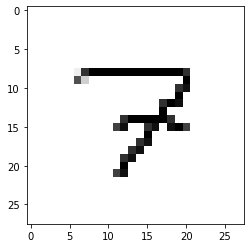

1/1 [==============================] - 0s 18ms/step
The number is probably a 2


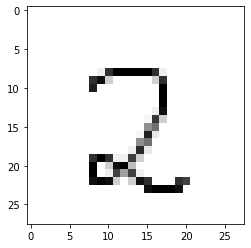

1/1 [==============================] - 0s 33ms/step
The number is probably a 9


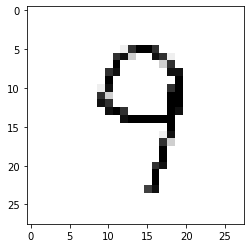

1/1 [==============================] - 0s 51ms/step
The number is probably a 8


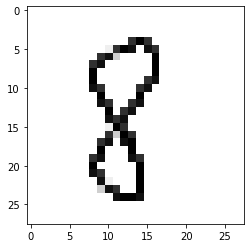

1/1 [==============================] - 0s 28ms/step
The number is probably a 5


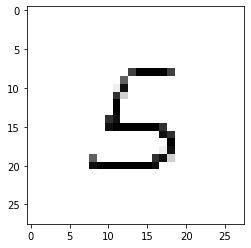

1/1 [==============================] - 0s 44ms/step
The number is probably a 6


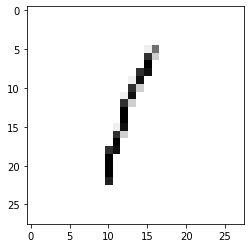

1/1 [==============================] - 0s 25ms/step
The number is probably a 1


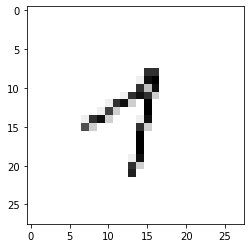

1/1 [==============================] - 0s 43ms/step
The number is probably a 1


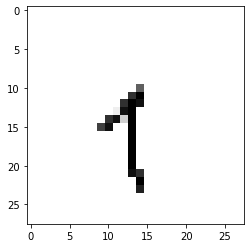

1/1 [==============================] - 0s 32ms/step
The number is probably a 7


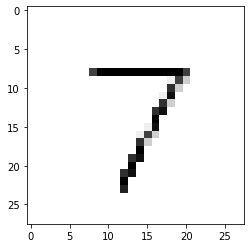

1/1 [==============================] - 0s 33ms/step
The number is probably a 7


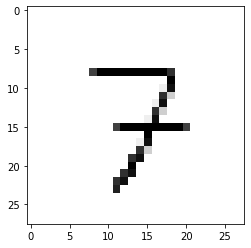

1/1 [==============================] - 0s 33ms/step
The number is probably a 9


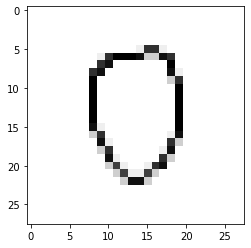

1/1 [==============================] - 0s 31ms/step
The number is probably a 5


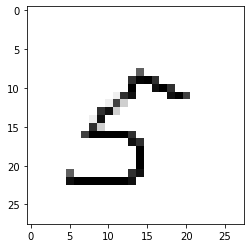

1/1 [==============================] - 0s 41ms/step
The number is probably a 3


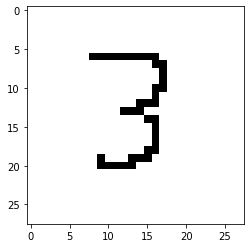

1/1 [==============================] - 0s 25ms/step
The number is probably a 2


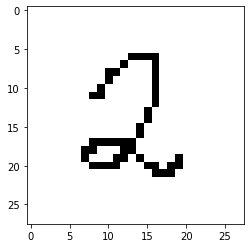

1/1 [==============================] - 0s 24ms/step
The number is probably a 1


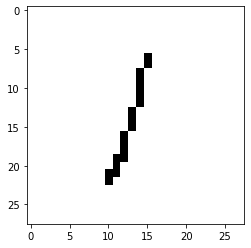

1/1 [==============================] - 0s 56ms/step
The number is probably a 0


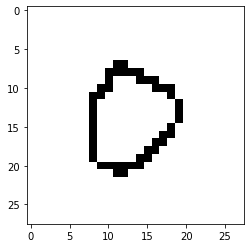

1/1 [==============================] - 0s 33ms/step
The number is probably a 1


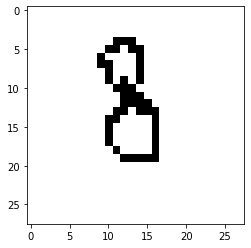

1/1 [==============================] - 0s 66ms/step
The number is probably a 7


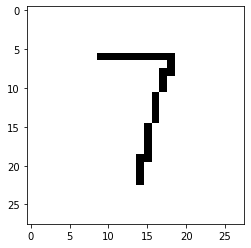

1/1 [==============================] - 0s 33ms/step
The number is probably a 4


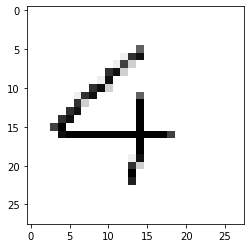

1/1 [==============================] - 0s 35ms/step
The number is probably a 9


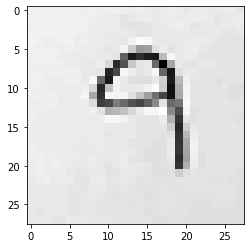

1/1 [==============================] - 0s 49ms/step
The number is probably a 9


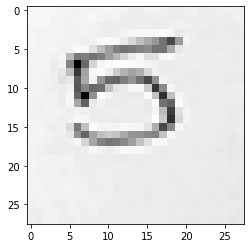

In [2]:
# Load custom images and predict them
image_number = 1
while os.path.isfile('digits/digit{}.png'.format(image_number)):
    try:
        img = cv2.imread('digits/digit{}.png'.format(image_number))[:,:,0]
        img = np.invert(np.array([img]))
        prediction = model.predict(img)
        print("The number is probably a {}".format(np.argmax(prediction)))
        plt.imshow(img[0], cmap=plt.cm.binary)
        plt.show()
        image_number += 1
    except:
        print("Error reading image! Proceeding with next image...")
        image_number += 1